In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series

In [2]:
tips=pd.read_csv("examples/tips.csv")
tips[:6]

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
5,25.29,4.71,No,Sun,Dinner,4


In [3]:
tips['tip_pct']=tips['tip']/tips['total_bill']
tips[:3]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587


In [4]:
grouped=tips.groupby(['size','smoker'])
grouped_pct=grouped['tip_pct']
grouped_pct.agg(['mean','var'])

mean       var
size smoker                    
1    No      0.159829  0.000959
     Yes     0.274755  0.005198
2    No      0.164996  0.001798
     Yes     0.166706  0.008193
3    No      0.149671  0.001434
     Yes     0.157543  0.003645
4    No      0.147604  0.000778
     Yes     0.142036  0.004500
5    No      0.178415  0.003645
     Yes     0.086116  0.000837
6    No      0.156229  0.001777

In [7]:
states=['Ohio','New York','Vermont','Florida','Oregon','Nevada','Califonia','Idaho']
groupkeys=['West']*4+['East']*4
data=Series(data=np.random.randn(8),index=states)
data[::3]=np.nan
data.groupby(groupkeys).mean()
# lambda表达式
fill_mean=lambda x: x.fillna(x.mean())
# another 
data.groupby(groupkeys).apply(fill_mean)

Ohio         0.585454
New York     0.945742
Vermont      0.225165
Florida      0.585454
Oregon      -1.433517
Nevada       0.771059
Califonia   -0.184630
Idaho        0.108568
dtype: float64

In [9]:
# 填充值
fill_values={'West':1,'East':2}
fill_func=lambda x:x.fillna(fill_values[x.name])
data.groupby(groupkeys).apply(fill_func)

Ohio         1.000000
New York     0.945742
Vermont      0.225165
Florida      1.000000
Oregon      -1.433517
Nevada       0.771059
Califonia    2.000000
Idaho        0.108568
dtype: float64

In [13]:
# 随机采样和排列
suits=['H','S','C','D']
card_val=(list(range(1,11))+[10]*3)*4
base_name=['A']+list(range(2,11))+['J','Q','K']
cards=[]
for suit in suits:
    cards.extend(str(num)+suit  for num in base_name)
deck=Series(card_val,index=cards)
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
QH     10
KH     10
dtype: int64

In [15]:
def randomCards(reck,n=5):
    return reck.take(np.random.permutation(len(reck))[:n])
randomCards(deck)

7D    7
AS    1
AC    1
dtype: int64

In [17]:
get_suits=lambda x:x[-1]
# 默认可根据index进行groupby，
# apply函数--》分组级函数，即对groupby之后的dataframe按照分组进行参与运算
deck.groupby(get_suits).apply(randomCards,3)

C  10C    10
   7C      7
   6C      6
D  5D      5
   7D      7
   2D      2
H  4H      4
   KH     10
   QH     10
S  5S      5
   6S      6
   2S      2
dtype: int64

In [20]:
# 在默认为None的时候，pandas会自动将第一列作为索引，并额外添加一列。所以大多我们会使用index_col=0，直接将第一列作为索引，不额外添加列
# 假设你有一个格式错误的文件，文件的每行末尾都有分隔符。可以使用False来强制不使用第一列作为索引，同时丢弃最后一列
close_px=pd.read_csv('examples/stock_px_2.csv',parse_dates=True,index_col=0)
close_px[-5:]

,AAPL,MSFT,XOM,SPX
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


In [23]:
# 百分数变化
close_px.pct_change()[-5:]
rets=close_px.pct_change().dropna()

In [24]:
spx_corr=lambda x:x.corrwith(x['SPX'])
by_year=rets.groupby(lambda x:x.year)
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [25]:
by_year.apply(lambda x:x['AAPL'].corr(x['XOM']))

2003    0.293424
2004    0.235687
2005    0.300955
2006    0.211307
2007    0.334580
2008    0.490468
2009    0.467704
2010    0.529155
2011    0.556787
dtype: float64

In [27]:
# 面向分组的线性回归
import statsmodels.api as sm
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params
by_year.apply(regress,'AAPL',['SPX'])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


In [28]:
# 透视表
# pivot_table
# 维基百科：是用来汇总其它表的数据。首先把源表分组（grouping），然后对各组内数据做汇总操作如排序、平均、累加、计数或字符串连接等
# e.g:源表有两列分别为性别与“身高”，每行给出一个人的性别与高度；透视表有两行两列，在“性别”列分别写“男性”与“女性”，
# 在“身高”列分别写对应性别的平均身高
tips=pd.read_csv('examples/tips.csv')
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
5,25.29,4.71,No,Sun,Dinner,4,0.186240


In [30]:
# groupby-key:day
#功能：默认为均值
tips.pivot_table(['tip_pct','tip'],index=['day'],columns='smoker')

tip             tip_pct          
smoker        No       Yes        No       Yes
day                                           
Fri     2.812500  2.714000  0.151650  0.174783
Sat     3.102889  2.875476  0.158048  0.147906
Sun     3.167895  3.516842  0.160113  0.187250
Thur    2.673778  3.030000  0.160298  0.163863

In [31]:
# 通过设置margins=True，为各个统计分组添加汇总项
tips.pivot_table(['tip_pct','tip'],index='day',columns='smoker',margins=True)

tip                       tip_pct                    
smoker        No       Yes       All        No       Yes       All
day                                                               
Fri     2.812500  2.714000  2.734737  0.151650  0.174783  0.169913
Sat     3.102889  2.875476  2.993103  0.158048  0.147906  0.153152
Sun     3.167895  3.516842  3.255132  0.160113  0.187250  0.166897
Thur    2.673778  3.030000  2.771452  0.160298  0.163863  0.161276
All     2.991854  3.008710  2.998279  0.159328  0.163196  0.160803

In [33]:
# pivot_table：默认为均值，通过设置aggfunc可以设定聚合函数类型
tips.pivot_table('tip_pct',index='smoker',columns='day',margins=True,aggfunc=len)

day,Fri,Sat,Sun,Thur,All
smoker,,,,,
No,4.0,45.0,57.0,45.0,151.0
Yes,15.0,42.0,19.0,17.0,93.0
All,19.0,87.0,76.0,62.0,244.0


In [35]:
# fill_value
# 填充空（NA）的组合
tips.pivot_table('size',index=['time','smoker'],columns='day',aggfunc='sum',margins=True,fill_value=0)

day            Fri  Sat  Sun  Thur  All
time   smoker                          
Dinner No        6  115  167     2  290
       Yes      20  104   49     0  173
Lunch  No        3    0    0   110  113
       Yes      11    0    0    40   51
All             40  219  216   152  627

In [38]:
# aggfunc可以为自定义函数
udf_len=lambda x:len(x)-1
tips.pivot_table('tip_pct',index='smoker',columns='day',margins=True,aggfunc=udf_len)

day,Fri,Sat,Sun,Thur,All
smoker,,,,,
No,3.0,44.0,56.0,44.0,150.0
Yes,14.0,41.0,18.0,16.0,92.0
All,18.0,86.0,75.0,61.0,243.0


In [41]:
# # 
#             交叉表
# # 是用于计算分组频率的特殊透视表 
from io import StringIO
data = """\
Sample  Nationality  Handedness
1   USA  Right-handed
2   Japan    Left-handed
3   USA  Right-handed
4   Japan    Right-handed
5   Japan    Left-handed
6   Japan    Right-handed
7   USA  Right-handed
8   USA  Left-handed
9   Japan    Right-handed
10  USA  Right-handed"""
data = pd.read_table(StringIO(data), sep='\s+')
data[:3]

D:\soft_Install\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: read_table is deprecated, use read_csv instead.


,Sample,Nationality,Handedness
0,1,USA,Right-handed
1,2,Japan,Left-handed
2,3,USA,Right-handed


In [42]:
# 以下操作也可用透视表实现
pd.crosstab(data.Nationality,data.Handedness,margins=True)

Handedness,Left-handed,Right-handed,All
Nationality,,,
Japan,2,3,5
USA,1,4,5
All,3,7,10


In [44]:
pd.crosstab([tips.time,tips.day],tips.smoker,margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

In [60]:
fec=pd.read_csv('datasets/fec/P00000001-ALL.csv')
fec.loc[800]

D:\soft_Install\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


cmte_id                              C00431171
cand_id                              P80003353
cand_nm                           Romney, Mitt
contbr_nm            WILKERSON, WILLIAM C. DR.
contbr_city                             MOBILE
contbr_st                                   AL
contbr_zip                         3.66892e+08
contbr_employer                  SELF-EMPLOYED
contbr_occupation                 PSYCHIATRIST
contb_receipt_amt                          100
contb_receipt_dt                     16-MAR-12
receipt_desc                               NaN
memo_cd                                    NaN
memo_text                                  NaN
form_tp                                  SA17A
file_num                                780128
Name: 800, dtype: object

In [61]:
unique_cands=fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [62]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [63]:

fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [68]:
fec['party']=fec.cand_nm.map(parties)
fec['party'].value_counts()

Democrat      589127
Republican    402348
Name: party, dtype: int64

In [98]:
fec=fec[fec.contb_receipt_amt>0]
fec_mrbo=fec[fec.cand_nm.isin(['Obama, Barack','Romney, Mitt'])]

In [99]:
fec['contbr_occupation'].value_counts()[:10]

RETIRED         233990
NOT PROVIDED     57151
ATTORNEY         34286
HOMEMAKER        29931
PHYSICIAN        23432
ENGINEER         14334
TEACHER          13990
CONSULTANT       13273
PROFESSOR        12555
NOT EMPLOYED      9828
Name: contbr_occupation, dtype: int64

In [100]:
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO'
}

# If no mapping provided, return x
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [101]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

# If no mapping provided, return x
fec.contbr_employer = fec.contbr_employer.map(lambda x: emp_mapping.get(x, x))

In [102]:
fec.loc[50000]

cmte_id                          C00431171
cand_id                          P80003353
cand_nm                       Romney, Mitt
contbr_nm            PALANDJIAN, PETER MR.
contbr_city                        BELMONT
contbr_st                               MA
contbr_zip                        24782124
contbr_employer           INTERCONTINENTAL
contbr_occupation        CHAIRMAN & C.E.O.
contb_receipt_amt                     5000
contb_receipt_dt                 06-MAY-11
receipt_desc             SEE REATTRIBUTION
memo_cd                                NaN
memo_text                SEE REATTRIBUTION
form_tp                              SA17A
file_num                            760248
party                           Republican
Name: 50000, dtype: object

In [103]:
by_occupation=fec.pivot_table('contb_receipt_amt',index='contbr_occupation',columns='party',aggfunc='sum')

In [104]:
by_occupation

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
'MIS MANAGER,NaN,177.60
(PART-TIME) SALES CONSULTANT & WRITER,NaN,285.00
(RETIRED),NaN,250.00
-,5000.0,2114.80


In [105]:
dt=DataFrame(np.arange(16).reshape((4,4)))
dt
# 统计行数据
dt.sum(axis=1)

0     6
1    22
2    38
3    54
dtype: int64

In [106]:
over_2mm=by_occupation[by_occupation.sum(1)>2000000]
over_2mm[:5]

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
CEO,2074974.79,4211040.52
CONSULTANT,2459912.71,2544725.45
ENGINEER,951525.55,1818373.70
EXECUTIVE,1355161.05,4138850.09


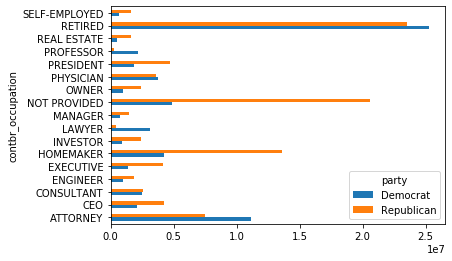

In [107]:
# barh:水平柱状图
over_2mm.plot(kind='barh')

In [108]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)
grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer   
Obama, Barack  RETIRED               22694358.85
               SELF-EMPLOYED         18626807.16
               NOT EMPLOYED           8586308.70
               NOT PROVIDED           5053480.37
               HOMEMAKER              2605408.54
               STUDENT                 318831.45
               VOLUNTEER               257104.00
               MICROSOFT               215585.36
               SIDLEY AUSTIN LLP       168254.00
               REFUSED                 149516.07
Romney, Mitt   NOT PROVIDED          12059527.24
               RETIRED               11506225.71
               HOMEMAKER              8147196.22
               SELF-EMPLOYED          7414115.22
               STUDENT                 496490.94
               CREDIT SUISSE           281150.00
               MORGAN STANLEY          267266.00
               GOLDMAN SACH & CO.      238250.00
               BARCLAYS CAPITAL        162750.00
               H.I.G. CAPITAL      

In [109]:
bins = np.array([0, 1, 10, 100, 1000, 10000,
                 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels[:10]

411      (10, 100]
412    (100, 1000]
413    (100, 1000]
414      (10, 100]
415      (10, 100]
416      (10, 100]
417    (100, 1000]
418      (10, 100]
419    (100, 1000]
420      (10, 100]
Name: contb_receipt_amt, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [113]:
import matplotlib.pyplot as plt
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [115]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums


cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


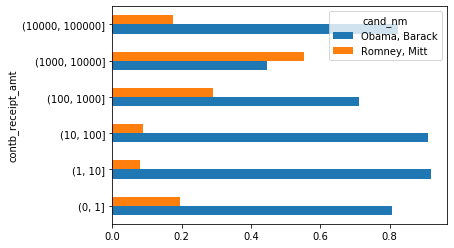

In [116]:
normed_sums[:-2].plot(kind='barh')